In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

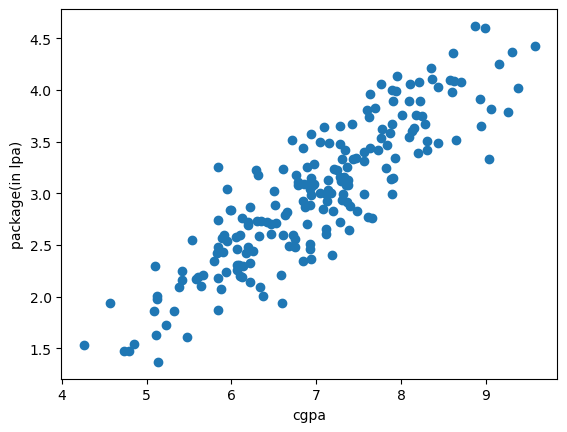

In [7]:
#plotting these datas into graph
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [8]:
#creating a model which will predict the package based on the cgpa
#segregate the x and y column
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [10]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [13]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [14]:
# now we are diving the data into two sets 
# training set - used to train the model
# test_size =2 -----> 20% data is used for test in this model 
# test set - used for testing the model 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size =0.2,random_state = 2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
#model.fit - used to tarin the data
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [20]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [22]:
# predict the data and reshape the 1d data to 1,1
lr.predict(x_test.iloc[0].values.reshape(1,1))

C:\Users\Insha sadaf\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'package(in lpa)')

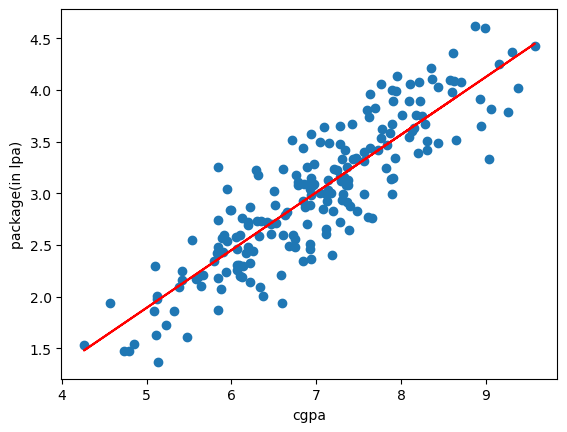

In [23]:
# to see whether a best fit line is drawn over the plot or not 
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [25]:
m = lr.coef_

In [26]:
c = lr.intercept_

In [28]:
# y = mx+c
m *8.58+c

array([3.89111601])

In [29]:
m *9.5+c

array([4.40443183])

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
y_pred = lr.predict(x_test)

In [35]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [36]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [37]:
print("mse", mean_squared_error(y_test,y_pred))

mse 0.12129235313495527


In [39]:
print("mse", np.sqrt(mean_squared_error(y_test,y_pred)))

mse 0.34827051717731616


In [50]:
print("R2 score ", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score  0.780730147510384


In [51]:
#adjusted r2 score
x_test.shape

(40, 1)

In [52]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415